In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# **TITANIC SURVIVAL PREDICTION**

**Importing libraries**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

**Loading the Data**

In [4]:
# Load the Titanic dataset
url = '/kaggle/input/titanic-dataset/Titanic-Dataset.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**Data Preprocessing**

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Selecting features and handling missing values
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Fill missing Age with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Convert 'Sex' to numeric
data['Sex'] = np.where(data['Sex'] == 'male', 0, 1)  # Male = 0, Female = 1

# Drop any rows with missing values
data.dropna(inplace=True)

# Define features and target
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

/tmp/ipykernel_30/1729876645.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


**Visualizing the dataset**

In [7]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
data["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

**Here one(1) stands for survived and zero(0) stands for not survived**

<Axes: xlabel='Survived', ylabel='count'>

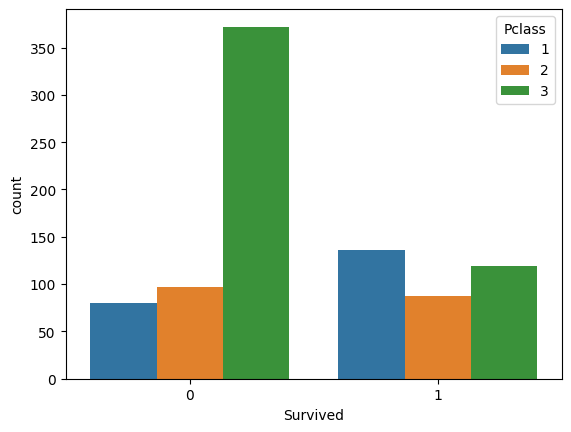

In [9]:
sns.countplot(x=data["Survived"],hue=data["Pclass"])

**Here one(1) stands for survived and zero(0) stands for not survived, blue for male and orange for female**

<Axes: xlabel='Sex', ylabel='count'>

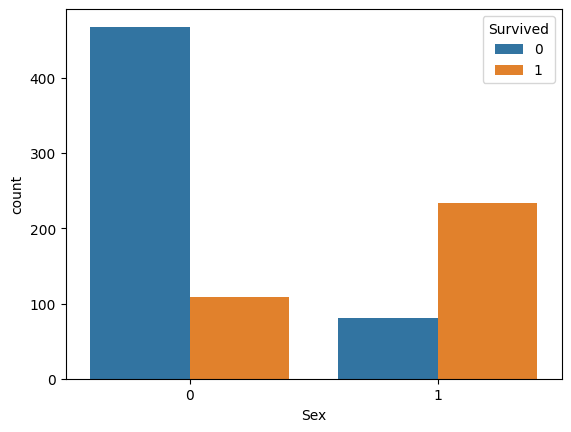

In [10]:
sns.countplot(x=data["Sex"],hue=data["Survived"])

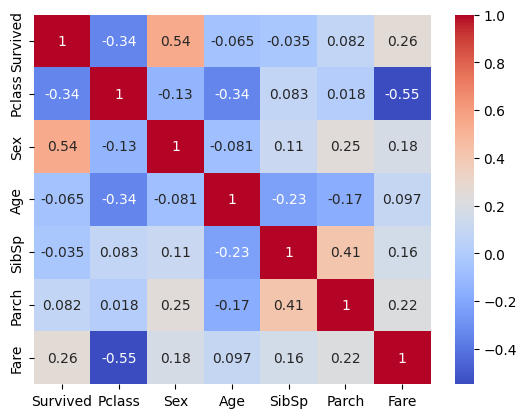

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


**Manipulating the Features**

In [12]:
data['Family_Size'] = data['SibSp'] + data['Parch']
data['Age_Binned'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 80], labels=[0, 1, 2, 3, 4])


**Hyperparameter Tuning:**

**Training the Model using random forest**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


**Cross-Validation:**

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print(f'Cross-validated accuracy: {scores.mean():.2f}')


Cross-validated accuracy: 0.81


**Step 4: Spliting the Data**

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Confusion Matrix**

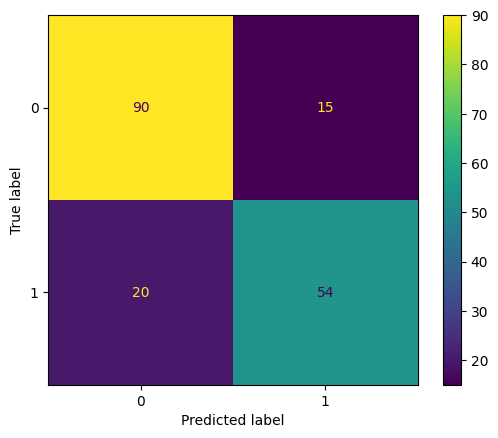

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

**Evaluate the Model**

In [19]:
accuracy_rf = accuracy_score(y_test, y_pred)
confusion_rf = confusion_matrix(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Confusion Matrix:')
print(confusion_rf)
print('Random Forest Classification Report:')
print(report_rf)


Random Forest Accuracy: 0.80
Random Forest Confusion Matrix:
[[90 15]
 [20 54]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



**The model has 80% acccuracy**

In [20]:
import logging
logging.basicConfig(level=logging.INFO)
logging.info("Making predictions...")
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]


**Make Predictions**

In [21]:
y_pred = model.predict(X_test)
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(predictions.reset_index(drop=True))



     Actual  Predicted
0         1          0
1         0          0
2         0          0
3         1          1
4         1          0
..      ...        ...
174       0          0
175       0          0
176       1          0
177       1          1
178       1          1

[179 rows x 2 columns]
